<a href="https://colab.research.google.com/github/BrunoWLP/Tratamento-e-AED-cars.csv/blob/main/AED_cars_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Exploratória de Dados

In [49]:
import pandas as pd
import numpy as np

In [50]:
# from google.colab import drive
# drive.mount('/content/drive')
cars_original = pd.read_csv('/content/drive/MyDrive/cars.csv', index_col=0)

### Dicionário de Dados

- Symboling - 				Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
- carCompany -				Name of car company (Categorical)
- fueltype -				Car fuel type i.e gas or diesel (Categorical)
- aspiration -				Aspiration used in a car (Categorical)
- doornumber -				Number of doors in a car (Categorical)
- carbody -				body of car (Categorical)
- drivewheel -				type of drive wheel (Categorical)
- enginelocation -				Location of car engine (Categorical)
- wheelbase -				Weelbase of car (Numeric)
- carlength -				Length of car (Numeric)
- carwidth -				Width of car (Numeric)
- carheight -				height of car (Numeric)
- curbweight -				The weight of a car without occupants or baggage. (Numeric)
- enginetype -				Type of engine. (Categorical)
- cylindernumber -				cylinder placed in the car (Categorical)
- enginesize -				Size of car (Numeric)
- fuelsystem -				Fuel system of car (Categorical)
- boreratio -				Boreratio of car (Numeric)
- stroke -				Stroke or volume inside the engine (Numeric)
- compressionratio -				compression ratio of car (Numeric)
- horsepower -				Horsepower (Numeric)
- peakrpm -				car peak rpm (Numeric)
- citympg -				Mileage in city (Numeric)
- highwaympg -				Mileage on highway (Numeric)
- price(Dependent variable) -				Price of car (Numeric)


In [51]:
cars = cars_original.copy()

In [52]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [53]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Tratamento dos Dados

In [54]:
# Livrando-se das colunas inúteis

# cars.drop(columns=['Unnamed: 0'], inplace=True)

# Desnecessário após incluir index_col=0 na leitura do arquivo

In [55]:
# Substituindo todos os '?' por NaN

cars = cars.replace('?', np.nan)

In [56]:
# Quantos NaN estão presentes?

cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [57]:
# Substituição dos NaN pela média dos valores equivalentes de cada coluna.

cars['normalized-losses'] = cars['normalized-losses'].replace(np.nan, cars['normalized-losses'].astype('float').mean())
cars['bore'] = cars['bore'].replace(np.nan, cars['bore'].astype('float').mean())
cars['stroke'] = cars['stroke'].replace(np.nan, cars['stroke'].astype('float').mean())
cars['horsepower'] = cars['horsepower'].replace(np.nan, cars['horsepower'].astype('float').mean())
cars['peak-rpm'] = cars['peak-rpm'].replace(np.nan, cars['peak-rpm'].astype('float').mean())

# Poderia ter usado esta estrutura também
# cars['normalized-losses'] = cars['normalized-losses'].fillna(cars['normalized-losses'].mean())

cars[['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']].head()

,normalized-losses,bore,stroke,horsepower,peak-rpm
0,122.0,3.47,2.68,111,5000
1,122.0,3.47,2.68,111,5000
2,122.0,2.68,3.47,154,5000
3,164,3.19,3.40,102,5500
4,164,3.19,3.40,115,5500


In [58]:
cars['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [59]:
# Para a coluna 'num-of-doors' os NaN serão substituídos pela moda.
cars['num-of-doors'] = cars['num-of-doors'].replace(np.nan, 'four')

### Regressão Linear para preencher valores nulos de 'price'

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Cópia do dataset com drop nos valores nulos de price; Será base para a regressão linear, para posteriormente preencher os valores nulos do dataset original
copy_cars = cars.copy()
copy_cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [62]:
# Correção dos tipos dos dados
copy_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [63]:
copy_cars = copy_cars.dropna(subset=['price'], axis=0)

In [64]:
copy_cars[['price']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   201 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


In [65]:
copy_cars[['horsepower']] = copy_cars[['horsepower']].astype('int')
copy_cars[['price']] = copy_cars[['price']].astype('float')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


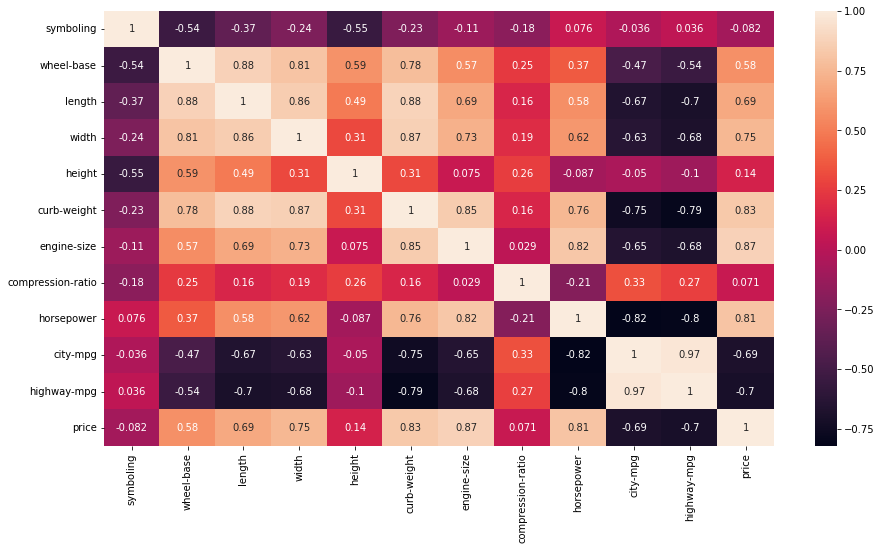

In [66]:
plt.subplots(figsize=(15,8))
sns.heatmap(copy_cars.corr(), annot=True)

#### Regressão Linear Simples utilizando 'engine-size' como referência (correlação 0.87)

In [67]:
from sklearn.linear_model import LinearRegression


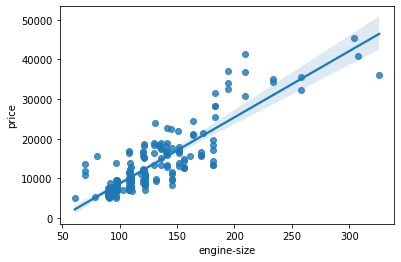

In [68]:
sns.regplot(x='engine-size', y='price', data=copy_cars)
plt.show()

In [69]:
lm = LinearRegression()

X = copy_cars[['engine-size']]
Y = copy_cars[['price']]

In [70]:
lm.fit(X, Y)

LinearRegression()

In [71]:
Y_pred = lm.predict(X)

In [72]:
lm.score(X, Y)

0.7609686443622008

Voltando ao dataset original...

In [74]:
cars[cars['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [75]:
# Substituindo os valores nulos de preço pelo valores da regressão

# def newPrice(row):
#   ENGINE_SIZE = row['engine-size']
#   return round((lm.intercept_[0] + lm.coef_[0] * ENGINE_SIZE)[0], 0)  

cars['predicted_price'] = cars['engine-size'].apply(lambda x: round((lm.intercept_[0] + lm.coef_[0] * x)[0], 0))
# o objetivo dos [0] é fazer com que o valor perca a aparência de array e seja inserido no dataset como um float

In [76]:
cars['price'] = cars['price'].fillna(cars['predicted_price'])

In [77]:
# Dropando as colunas temporárias
cars = cars.drop(columns='predicted_price')


In [81]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [79]:
cars.shape

(205, 26)

In [80]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Análise dos Dados